# Trabajo Final de Grado: Predicción de Precios de Acciones con Modelos de Aprendizaje Profundo

Este proyecto aborda la predicción de precios de acciones utilizando técnicas avanzadas de aprendizaje automático y aprendizaje profundo, combinando modelos tradicionales con redes neuronales recurrentes. El objetivo principal es evaluar el rendimiento de diferentes enfoques para determinar su eficacia en el análisis de series temporales financieras.

## Etapas del proyecto
El trabajo sigue una metodología estructurada, dividida en las siguientes etapas:
1. **Preprocesamiento de datos:** Limpieza, normalización y generación de indicadores técnicos como SMA, EMA y RSI, esenciales para enriquecer los datos utilizados por los modelos.
2. **Visualización y análisis exploratorio:** Creación de gráficos que faciliten la comprensión de los datos y los patrones subyacentes.
3. **Implementación de modelos base:** Construcción de un modelo de regresión lineal como referencia inicial para comparar los resultados.
4. **Implementación de modelos avanzados:** Diseño, entrenamiento y optimización de redes LSTM y GRU, incluyendo experimentos con diferentes configuraciones de hiperparámetros.

## Librerías utilizadas
- `pandas` y `numpy` para manipulación y análisis de datos.
- `sklearn` para el modelo base y evaluación de métricas.
- `tensorflow` para la construcción y entrenamiento de redes neuronales.
- `matplotlib` para visualización de datos y resultados.

## Dataset
El dataset utilizado (`aapl.csv`) contiene datos históricos de precios de acciones de Apple. Este archivo fue descargado de una fuente pública confiable y será preprocesado en las etapas iniciales para garantizar la calidad y consistencia de los datos.

## Estructura del Notebook
- **Sección 1:** Importación y configuración de librerías.
- **Sección 2:** Preprocesamiento de datos.
- **Sección 3:** Generación de indicadores técnicos y normalización final.
- **Sección 4:** Normalización final de indicadores.
- **Sección 5:** Visualización y análisis exploratorio.
- **Sección 6:** Implementación de modelos base (Regresión Lineal).
- **Sección 7:** Implementación de modelos avanzados (LSTM y GRU).
- **Sección 8:** Optimización de hiperparámetros.

**Nota:** Todos los archivos generados durante este proceso se almacenarán en la carpeta `data/` para mantener una estructura de trabajo organizada y reproducible.


## 1. Importación y configuración de librerías
En este primer bloque, se importan las librerías necesarias para todo el proyecto. Estas herramientas son fundamentales para manejar los datos, construir modelos y evaluar resultados.

- `pandas` y `numpy` se usarán para la manipulación y análisis de datos.
- `tensorflow` será la base para construir y entrenar redes neuronales.
- `sklearn` se empleará para la implementación del modelo de regresión lineal y la evaluación de métricas.
- `matplotlib` se utilizará para la visualización de datos e indicadores técnicos.

Además, se configura el entorno de trabajo estableciendo rutas estándar para cargar y guardar archivos.


In [13]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from itertools import product

# Configuración de rutas de archivos
DATA_PATH = 'data/'  # Carpeta para datasets y archivos procesados
print(f"Archivos se leerán de: {DATA_PATH}")


Archivos se leerán de: data/


## 2. Preprocesamiento de datos
En este bloque, se realiza el preprocesamiento inicial del dataset de precios históricos de acciones (`aapl.csv`). Los pasos principales incluyen:

1. **Cargar los datos:** Leer el archivo CSV y configurar la columna `Date` como índice.
2. **Conversión de tipos:** Convertir la columna de fechas al formato adecuado.
3. **Limpieza de datos:** Identificar y reportar valores nulos.
4. **Normalización:** Aplicar Min-Max Scaling para escalar todas las columnas al rango [0, 1].

El resultado de este proceso es un nuevo archivo llamado `aapl_normalized.csv`, que será la base para las siguientes etapas del análisis.


In [6]:
# Cargar el dataset original
file_path = DATA_PATH + 'aapl.csv'
apple_data = pd.read_csv(file_path)

# Convertir la columna 'Date' al formato de fecha y establecerla como índice
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data.set_index('Date', inplace=True)

# Comprobar valores nulos
missing_values = apple_data.isnull().sum()
print("Valores nulos por columna:")
print(missing_values)

# Normalizar columnas de precios y volumen
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(apple_data)
normalized_data = pd.DataFrame(scaled_data, columns=apple_data.columns, index=apple_data.index)

# Guardar datos normalizados
normalized_file_path = DATA_PATH + 'aapl_normalized.csv'
normalized_data.to_csv(normalized_file_path)
print(f"Datos normalizados guardados en: {normalized_file_path}")

# Visualización de los datos procesados
print("Primeras filas de los datos normalizados:")
print(normalized_data.head())

Valores nulos por columna:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Datos normalizados guardados en: data/aapl_normalized.csv
Primeras filas de los datos normalizados:
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1980-12-12  0.000970  0.000967  0.000981  0.000969   0.000768  0.063023
1980-12-15  0.000894  0.000886  0.000898  0.000887   0.000703  0.023516
1980-12-16  0.000784  0.000777  0.000787  0.000778   0.000616  0.014061
1980-12-17  0.000812  0.000811  0.000822  0.000812   0.000644  0.011462
1980-12-18  0.000853  0.000852  0.000863  0.000853   0.000676  0.009711


## 3. Generación de indicadores técnicos
En este bloque, se generan indicadores técnicos clave que enriquecen el dataset y ayudan a capturar patrones relevantes. Los indicadores incluyen:

1. **Media Móvil Simple (SMA):** Calculada para ventanas de 5, 10 y 20 días.
2. **Media Móvil Exponencial (EMA):** Calculada para una ventana de 10 días.
3. **Índice de Fuerza Relativa (RSI):** Calculado para una ventana de 14 días.
4. **Volatilidad histórica:** Desviación estándar de los precios de cierre para una ventana de 10 días.
5. **Rango Verdadero Promedio (ATR):** Indicador de volatilidad calculado para 14 días.

El archivo generado se guarda como `aapl_with_indicators.csv` y será normalizado en el siguiente paso.


In [7]:
# Cargar los datos normalizados
normalized_file_path = DATA_PATH + 'aapl_normalized.csv'
normalized_data = pd.read_csv(normalized_file_path, index_col='Date', parse_dates=True)

# Calcular indicadores técnicos
# 1. Media móvil simple (SMA) para ventanas de 5, 10 y 20 días
normalized_data['SMA_5'] = normalized_data['Close'].rolling(window=5).mean()
normalized_data['SMA_10'] = normalized_data['Close'].rolling(window=10).mean()
normalized_data['SMA_20'] = normalized_data['Close'].rolling(window=20).mean()

# 2. Media móvil exponencial (EMA) para una ventana de 10 días
normalized_data['EMA_10'] = normalized_data['Close'].ewm(span=10, adjust=False).mean()

# 3. Índice de Fuerza Relativa (RSI) para 14 días
delta = normalized_data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
normalized_data['RSI_14'] = 100 - (100 / (1 + rs))

# 4. Volatilidad histórica (desviación estándar de los precios de cierre en 10 días)
normalized_data['Volatility_10'] = normalized_data['Close'].rolling(window=10).std()

# 5. Rango verdadero promedio (ATR) para 14 días
high_low = normalized_data['High'] - normalized_data['Low']
high_close = (normalized_data['High'] - normalized_data['Close'].shift()).abs()
low_close = (normalized_data['Low'] - normalized_data['Close'].shift()).abs()
true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
normalized_data['ATR_14'] = true_range.rolling(window=14).mean()

# Guardar los datos con indicadores técnicos
indicators_file_path = DATA_PATH + 'aapl_with_indicators.csv'
normalized_data.to_csv(indicators_file_path)
print(f"Datos con indicadores técnicos guardados en: {indicators_file_path}")

# Visualización de los datos con indicadores añadidos
print("Primeras filas con indicadores técnicos añadidos:")
print(normalized_data.head(20))


Datos con indicadores técnicos guardados en: data/aapl_with_indicators.csv
Primeras filas con indicadores técnicos añadidos:
                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
1980-12-12  0.000970  0.000967  0.000981  0.000969   0.000768  0.063023   
1980-12-15  0.000894  0.000886  0.000898  0.000887   0.000703  0.023516   
1980-12-16  0.000784  0.000777  0.000787  0.000778   0.000616  0.014061   
1980-12-17  0.000812  0.000811  0.000822  0.000812   0.000644  0.011462   
1980-12-18  0.000853  0.000852  0.000863  0.000853   0.000676  0.009711   
1980-12-19  0.000942  0.000940  0.000953  0.000942   0.000746  0.006367   
1980-12-22  0.001018  0.001015  0.001029  0.001017   0.000806  0.004848   
1980-12-23  0.001087  0.001083  0.001098  0.001085   0.000860  0.006140   
1980-12-24  0.001176  0.001172  0.001188  0.001174   0.000930  0.006282   
1980-12-26  0.001341  0.001335  0.001354  0.001338

## 4. Normalización final de indicadores
Aquí se realiza un paso adicional de preprocesamiento para garantizar que todos los indicadores técnicos estén en el mismo rango. Los pasos incluyen:

1. **Eliminar valores nulos:** Remover filas generadas durante el cálculo de indicadores debido a ventanas de tiempo.
2. **Normalizar indicadores seleccionados:** Aplicar Min-Max Scaling a las columnas `SMA_5`, `EMA_10`, `RSI_14`, etc.
3. **Guardar el dataset final:** Crear un archivo llamado `aapl_normalized_with_indicators.csv`.

Este archivo será utilizado en las siguientes secciones para construir y entrenar los modelos.


In [8]:
# Cargar los datos generados previamente con indicadores técnicos
indicators_file_path = DATA_PATH + 'aapl_with_indicators.csv'
data_with_indicators = pd.read_csv(indicators_file_path, index_col='Date', parse_dates=True)

# 1. Eliminar filas con valores nulos generados por indicadores técnicos
data_with_indicators.dropna(inplace=True)

# 2. Normalización de los indicadores técnicos
indicators_to_normalize = ['SMA_5', 'SMA_10', 'SMA_20', 'EMA_10',
                           'RSI_14', 'Volatility_10', 'ATR_14']

# Aplicar escalado Min-Max
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(data_with_indicators[indicators_to_normalize])
data_with_indicators[indicators_to_normalize] = normalized_values

# Guardar los datos normalizados en un nuevo archivo CSV
final_data_file_path = DATA_PATH + 'aapl_normalized_with_indicators.csv'
data_with_indicators.to_csv(final_data_file_path)

print(f"Datos finalizados guardados en: {final_data_file_path}")
print("Primeras filas del conjunto final de datos:")
print(data_with_indicators.head())

Datos finalizados guardados en: data/aapl_normalized_with_indicators.csv
Primeras filas del conjunto final de datos:
                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
1981-01-12  0.001142  0.001131  0.001140  0.001126   0.000892  0.003007   
1981-01-13  0.001073  0.001063  0.001078  0.001065   0.000844  0.002919   
1981-01-14  0.001073  0.001070  0.001084  0.001072   0.000849  0.001739   
1981-01-15  0.001107  0.001110  0.001119  0.001106   0.000876  0.001709   
1981-01-16  0.001100  0.001090  0.001105  0.001092   0.000865  0.001618   

               SMA_5    SMA_10    SMA_20    EMA_10    RSI_14  Volatility_10  \
Date                                                                          
1981-01-12  0.001102  0.001169  0.001034  0.001111  0.606179       0.001565   
1981-01-13  0.001083  0.001138  0.001038  0.001097  0.525001       0.001425   
1981-01-14  0.001080  0.001114  0.001048 

## 5. Visualización y análisis exploratorio.
Antes de entrenar los modelos, se realiza una exploración visual de los datos. Este paso incluye:

1. **Gráficas de precios históricos:** Visualización de la columna `Close`.
2. **Indicadores técnicos:** Superposición de indicadores como `SMA_5` y `RSI_14` para identificar tendencias y patrones.

Las visualizaciones ayudan a entender el comportamiento del mercado y a justificar el uso de ciertos modelos predictivos.


Gráfico guardado como imagen en: data/aapl_visualization.png


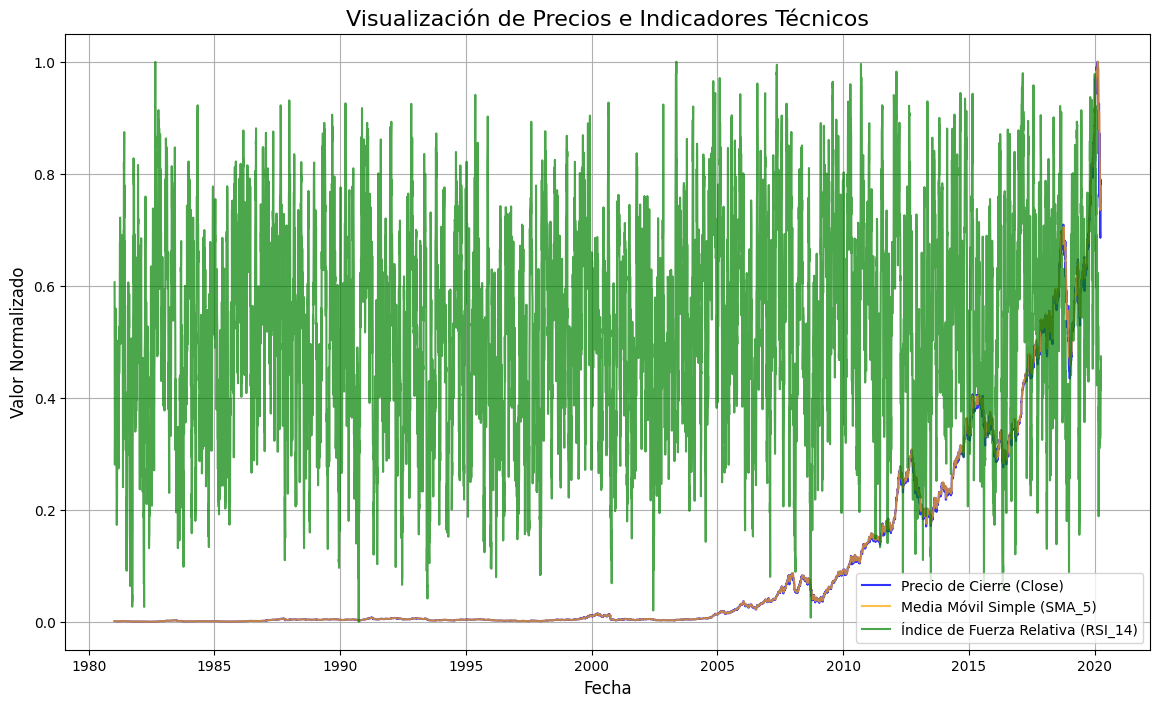

In [9]:
# Cargar los datos procesados
visualization_data_path = DATA_PATH + 'aapl_normalized_with_indicators.csv'
data = pd.read_csv(visualization_data_path, index_col='Date', parse_dates=True)

# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Graficar columnas de precios originales (Close)
plt.plot(data.index, data['Close'], label='Precio de Cierre (Close)', color='blue', alpha=0.8)

# Graficar indicadores técnicos (SMA_5, RSI_14)
plt.plot(data.index, data['SMA_5'], label='Media Móvil Simple (SMA_5)', color='orange', alpha=0.7)
plt.plot(data.index, data['RSI_14'], label='Índice de Fuerza Relativa (RSI_14)', color='green', alpha=0.7)

# Añadir título y etiquetas
plt.title('Visualización de Precios e Indicadores Técnicos', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor Normalizado', fontsize=12)
plt.legend()
plt.grid(True)

# Guardar el gráfico como imagen
output_image_path = DATA_PATH + 'aapl_visualization.png'
plt.savefig(output_image_path, dpi=300, bbox_inches='tight')  # Guardar con alta calidad
print(f"Gráfico guardado como imagen en: {output_image_path}")

# Mostrar el gráfico
plt.show()


## 6. Implementación del Modelo Base (Regresión Lineal)
Se construye un modelo de regresión lineal como línea base para comparar el rendimiento con los modelos avanzados. Los pasos incluyen:

1. **Crear el conjunto de entrenamiento y prueba:** Dividir los datos en un 80%-20%.
2. **Entrenar el modelo:** Utilizar el conjunto de entrenamiento para ajustar el modelo.
3. **Evaluar el modelo:** Calcular métricas como MSE y MAE para el conjunto de prueba.
4. **Visualizar resultados:** Comparar valores reales y predicciones en una gráfica.

Este modelo servirá como referencia inicial para evaluar la mejora introducida por los modelos LSTM y GRU.


Error cuadrático medio (MSE): 0.002056083900984111
Error absoluto medio (MAE): 0.03371469451530709


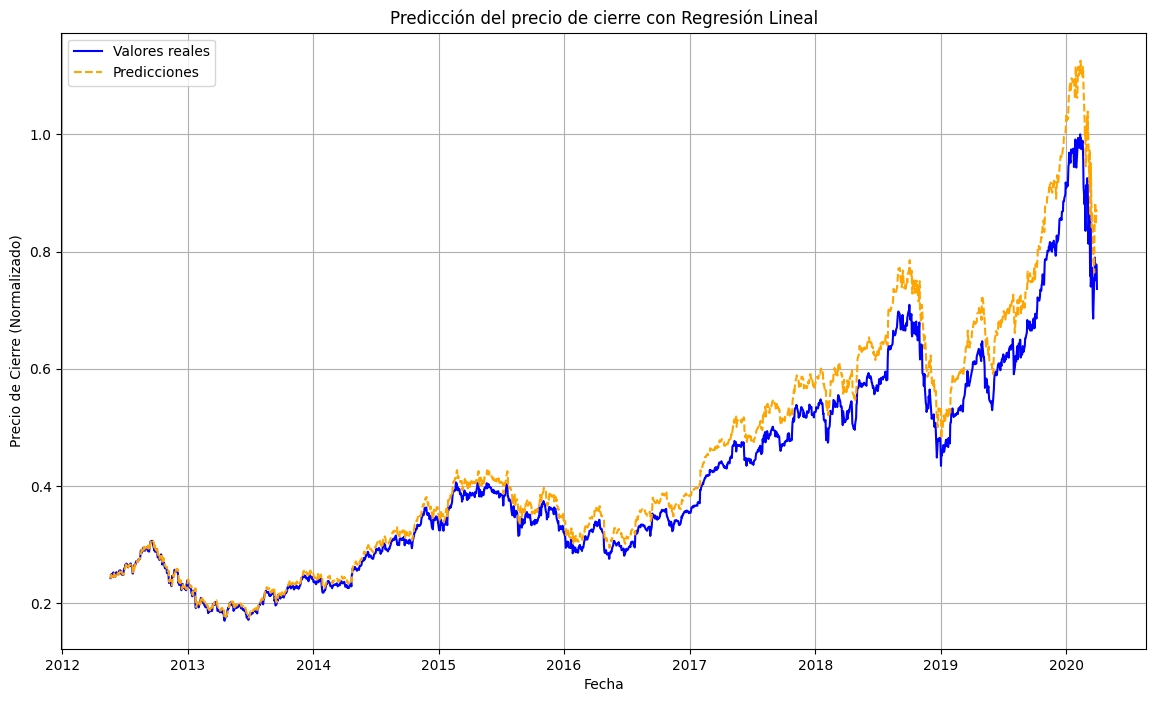

In [10]:
# Crear la variable objetivo y las características
data['Target'] = data['Close'].shift(-1)  # Precio de cierre del día siguiente
data.dropna(inplace=True)  # Eliminar filas con valores faltantes debido al shift

# Separar características (X) y variable objetivo (y)
X = data.drop(columns=['Close', 'Target'])  # Excluir la variable objetivo
y = data['Target']  # Precio de cierre del día siguiente

# Dividir en conjuntos de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MAE): {mae}")

# Visualizar los resultados
plt.figure(figsize=(14, 8))
plt.plot(y_test.index, y_test, label='Valores reales', color='blue')
plt.plot(y_test.index, y_pred, label='Predicciones', color='orange', linestyle='--')
plt.title('Predicción del precio de cierre con Regresión Lineal')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (Normalizado)')
plt.legend()
plt.grid(True)
plt.savefig(DATA_PATH + 'linear_regression_baseline.png', dpi=300, bbox_inches='tight')  # Guardar gráfico
plt.show()

## 7. Implementación de modelos avanzados (LSTM y GRU)
En esta sección, se implementan los modelos LSTM y GRU. Los pasos incluyen:

1. **Crear secuencias temporales:** Dividir los datos en ventanas de tiempo para capturar dependencias temporales.
2. **Configurar y entrenar los modelos:** Ajustar parámetros como el tamaño de la ventana, número de unidades y épocas de entrenamiento.
3. **Evaluar los modelos:** Comparar las métricas MSE y MAE entre los modelos LSTM y GRU.
4. **Visualizar las curvas de pérdida:** Analizar el comportamiento durante el entrenamiento para identificar problemas de sobreajuste.

Se prueban configuraciones con 5, 7 y 10 épocas para analizar la estabilidad y precisión de los modelos.

**Nota:** El código proporcionado en este bloque está configurado para entrenar los modelos durante **10 épocas**, pero puede ajustarse fácilmente modificando el parámetro `epochs` para adaptarse a diferentes experimentos.

2025-09-08 10:59:41.600256: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-09-08 10:59:41.600414: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-08 10:59:41.600745: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-08 10:59:41.600999: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-08 10:59:41.601367: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Tamaño de X_train: (7903, 10, 14), y_train: (7903,)
Tamaño de X_test: (1976, 10, 14), y_test: (1976,)
Entrenando el modelo LSTM para 10 épocas...


/Users/seed/opt/anaconda3/envs/stocks/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10


2025-09-08 10:59:43.043073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 9.3280e-05 - val_loss: 0.0070
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.3068e-04 - val_loss: 0.0013
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.1314e-05 - val_loss: 4.7118e-04
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.5474e-06 - val_loss: 7.4035e-04
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.6722e-06 - val_loss: 0.0017
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.1917e-06 - val_loss: 0.0021
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.4410e-06 - val_loss: 0.0016
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7087e-06 - val_loss: 0.0018
Epoch 9/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2.5625e-06 - val_loss: 0.0017
Epoch 10/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.6702e-06 - val_loss: 0.0021
Entrenando el modelo GRU para 10 épocas...
Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/s

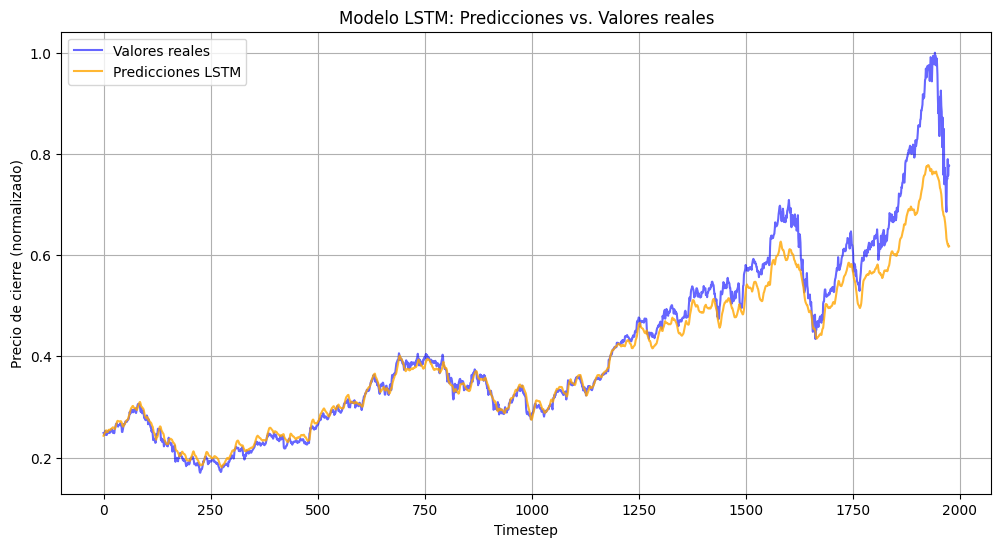

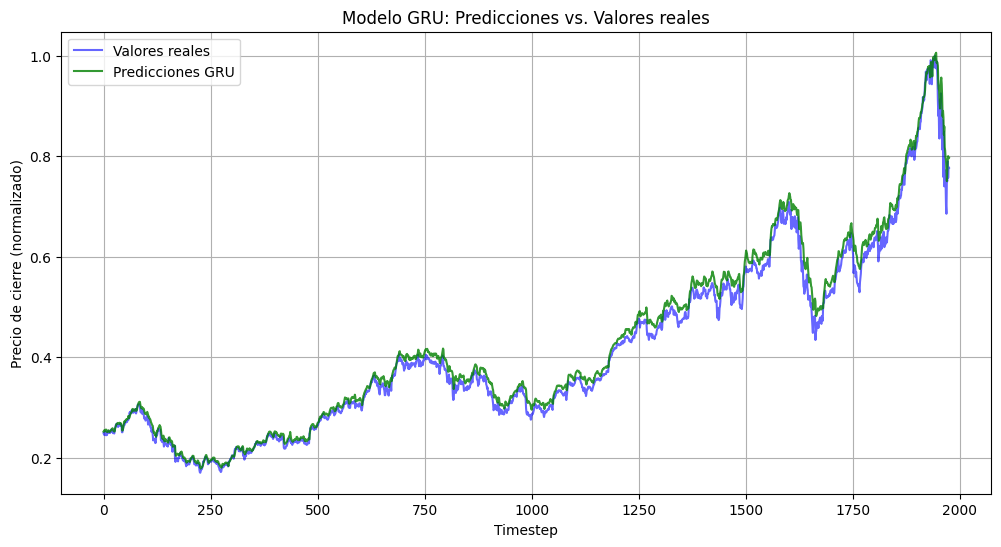

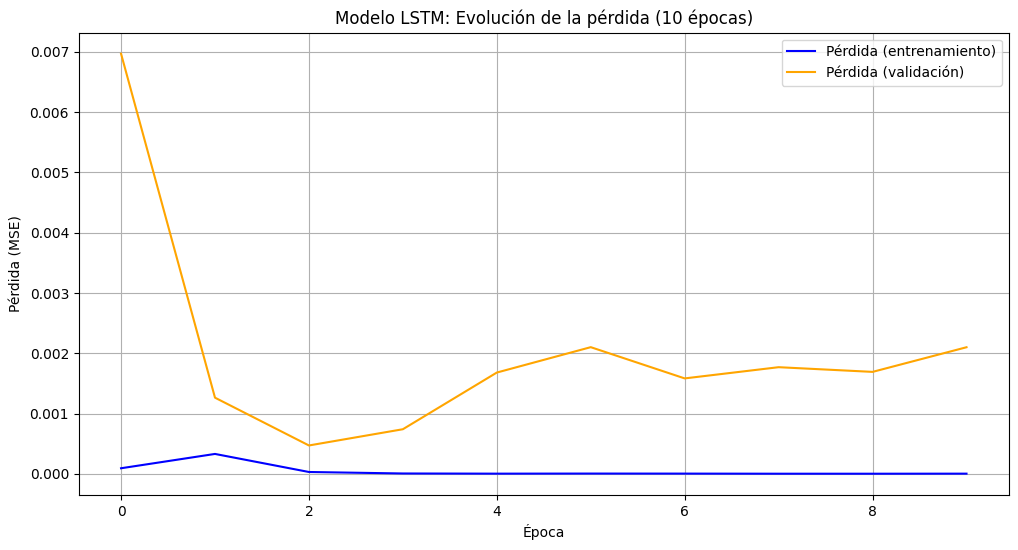

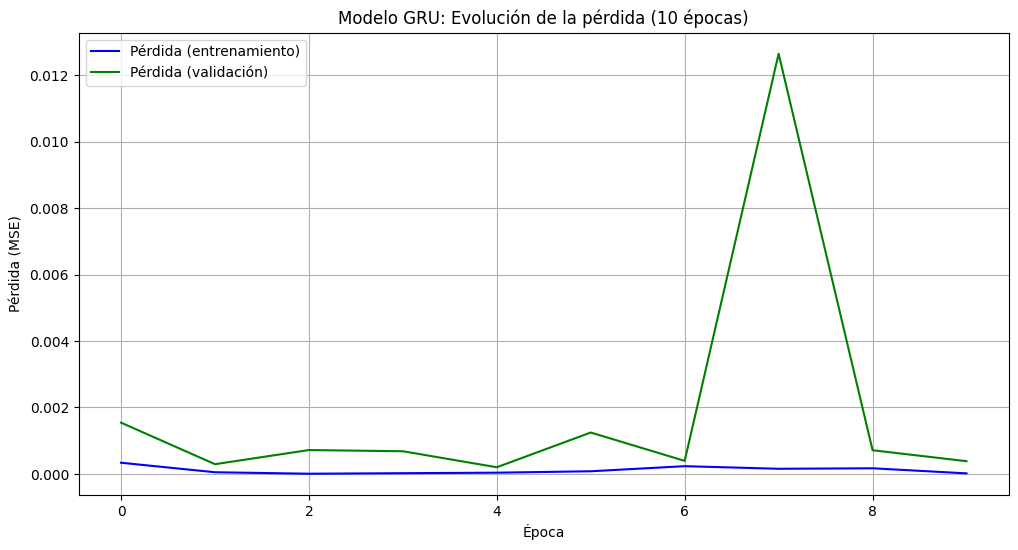

In [11]:
# Configuración del tamaño de la ventana
window_size = 10

# Crear secuencias para las redes neuronales
def create_sequences(data, window_size):
    sequences = []
    targets = []
    for i in range(len(data) - window_size):
        seq = data.iloc[i:i + window_size].values
        target = data.iloc[i + window_size]["Close"]  # Predicción del precio de cierre
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Crear secuencias a partir de las columnas del dataset
X, y = create_sequences(data, window_size)

# División en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convertir los datos en tf.data.Dataset para entrenamiento y prueba
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)

# Verificación de dimensiones
print(f"Tamaño de X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}, y_test: {y_test.shape}")

# Función para crear modelo LSTM
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape))  # 50 unidades LSTM
    model.add(Dense(1, activation='linear'))  # Capa densa con una neurona de salida (predicción de cierre)
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Optimización con Adam y MSE
    return model

# Función para crear modelo GRU
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(50, input_shape=input_shape))  # 50 unidades GRU
    model.add(Dense(1, activation='linear'))  # Capa densa con una neurona de salida (predicción de cierre)
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Optimización con Adam y MSE
    return model

# Ajustar el modelo LSTM
print("Entrenando el modelo LSTM para 10 épocas...")
lstm_model = create_lstm_model((X_train.shape[1], X_train.shape[2]))  # (10, 13)
lstm_history = lstm_model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Ajustar el modelo GRU
print("Entrenando el modelo GRU para 10 épocas...")
gru_model = create_gru_model((X_train.shape[1], X_train.shape[2]))  # (10, 13)
gru_history = gru_model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Evaluar los modelos
print("Evaluando el modelo LSTM para 10 épocas...")
lstm_mse = lstm_model.evaluate(test_dataset)
print(f"Error cuadrático medio (MSE) del modelo LSTM: {lstm_mse}")

print("Evaluando el modelo GRU para 10 épocas...")
gru_mse = gru_model.evaluate(test_dataset)
print(f"Error cuadrático medio (MSE) del modelo GRU: {gru_mse}")

# Calcular MAE manualmente
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)

mae_metric = tf.keras.metrics.MeanAbsoluteError()

lstm_mae = mae_metric(y_test, lstm_predictions).numpy()
gru_mae = mae_metric(y_test, gru_predictions).numpy()
print(f"Error absoluto medio (MAE) del modelo LSTM para 10 épocas: {lstm_mae}")
print(f"Error absoluto medio (MAE) del modelo GRU para 10 épocas: {gru_mae}")

# Visualización de predicciones: Modelo LSTM
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Valores reales", color="blue", alpha=0.6)
plt.plot(range(len(y_test)), lstm_predictions, label="Predicciones LSTM", color="orange", alpha=0.8)
plt.title("Modelo LSTM: Predicciones vs. Valores reales")
plt.xlabel("Timestep")
plt.ylabel("Precio de cierre (normalizado)")
plt.legend()
plt.grid(True)
plt.show()

# Visualización de predicciones: Modelo GRU
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Valores reales", color="blue", alpha=0.6)
plt.plot(range(len(y_test)), gru_predictions, label="Predicciones GRU", color="green", alpha=0.8)
plt.title("Modelo GRU: Predicciones vs. Valores reales")
plt.xlabel("Timestep")
plt.ylabel("Precio de cierre (normalizado)")
plt.legend()
plt.grid(True)

plt.show()

# Guardar las curvas de pérdida
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label="Pérdida (entrenamiento)", color="blue")
plt.plot(lstm_history.history['val_loss'], label="Pérdida (validación)", color="orange")
plt.title("Modelo LSTM: Evolución de la pérdida (10 épocas)")
plt.xlabel("Época")
plt.ylabel("Pérdida (MSE)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(gru_history.history['loss'], label="Pérdida (entrenamiento)", color="blue")
plt.plot(gru_history.history['val_loss'], label="Pérdida (validación)", color="green")
plt.title("Modelo GRU: Evolución de la pérdida (10 épocas)")
plt.xlabel("Época")
plt.ylabel("Pérdida (MSE)")
plt.legend()
plt.grid(True)
plt.show()

## 8. Optimización de hiperparámetros
Utilizando Grid Search, se optimizan parámetros clave para mejorar el rendimiento de los modelos avanzados. Los pasos incluyen:

1. **Definir el espacio de búsqueda:** Especificar valores posibles para el tamaño de la ventana, número de unidades, tamaño de lote y tasa de aprendizaje.
2. **Entrenar múltiples configuraciones:** Evaluar todas las combinaciones posibles utilizando el MSE como métrica principal.
3. **Seleccionar la mejor configuración:** Identificar la combinación de hiperparámetros que minimiza el error en el conjunto de prueba.

Los resultados se resumen en un DataFrame, ordenado por el MSE.

In [14]:
# Configuración del tamaño de la ventana y creación de secuencias
def create_sequences(data, window_size):
    sequences = []
    targets = []
    for i in range(len(data) - window_size):
        seq = data.iloc[i:i + window_size].values
        target = data.iloc[i + window_size]["Close"]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Parámetros de optimización
window_sizes = [10, 20, 30]
units_options = [32, 64, 128]
batch_sizes = [32, 64]
learning_rates = [0.001, 0.0005]

# Resultados
results = []

# Grid Search
for window_size, units, batch_size, learning_rate in product(window_sizes, units_options, batch_sizes, learning_rates):
    # Crear secuencias para esta ventana
    X, y = create_sequences(data, window_size)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Crear el modelo LSTM
    def create_lstm_model(input_shape, units, learning_rate):
        model = Sequential()
        model.add(LSTM(units, input_shape=input_shape))
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
        return model

    # Crear el modelo GRU
    def create_gru_model(input_shape, units, learning_rate):
        model = Sequential()
        model.add(GRU(units, input_shape=input_shape))
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
        return model

    # Entrenar y evaluar LSTM
    lstm_model = create_lstm_model((X_train.shape[1], X_train.shape[2]), units, learning_rate)
    lstm_model.fit(X_train, y_train, epochs=5, batch_size=batch_size, verbose=0)
    lstm_mse = lstm_model.evaluate(X_test, y_test, verbose=0)

    # Entrenar y evaluar GRU
    gru_model = create_gru_model((X_train.shape[1], X_train.shape[2]), units, learning_rate)
    gru_model.fit(X_train, y_train, epochs=5, batch_size=batch_size, verbose=0)
    gru_mse = gru_model.evaluate(X_test, y_test, verbose=0)

    # Guardar resultados
    results.append({
        "model": "LSTM",
        "window_size": window_size,
        "units": units,
        "batch_size": batch_size,
        "learning_rate": learning_rate,
        "mse": lstm_mse
    })
    results.append({
        "model": "GRU",
        "window_size": window_size,
        "units": units,
        "batch_size": batch_size,
        "learning_rate": learning_rate,
        "mse": gru_mse
    })

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)

# Mostrar las mejores configuraciones
print("Mejores configuraciones:")
print(results_df.sort_values(by="mse").head(10))

Mejores configuraciones:
   model  window_size  units  batch_size  learning_rate       mse
65   GRU           30    128          32         0.0010  0.000088
17   GRU           10    128          32         0.0010  0.000105
41   GRU           20    128          32         0.0010  0.000106
67   GRU           30    128          32         0.0005  0.000118
71   GRU           30    128          64         0.0005  0.000118
64  LSTM           30    128          32         0.0010  0.000124
49   GRU           30     32          32         0.0010  0.000150
40  LSTM           20    128          32         0.0010  0.000157
21   GRU           10    128          64         0.0010  0.000158
33   GRU           20     64          32         0.0010  0.000162
